In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import bs4
from bs4 import BeautifulSoup
import requests
import json
from decimal import Decimal
import os
import re
import matplotlib as plt
import seaborn as sb
import selenium
from selenium import webdriver
import time
from time import sleep
import io
from datetime import datetime
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
# PHASE 1 - HARKASHAT NETUNIM

In [3]:
df_1 = pd.read_csv('data_from_site_shirts4.csv', header=0, sep=',',dtype='unicode')          # import df

In [4]:
print(df_1.head())                                                                       # check that all df was uploaded

        category subCategory storeReview productRating productAmountOfBuy  \
0  Shirts & Tees    T-shirts      4.8461             4                 37   
1  Shirts & Tees    T-shirts      4.8461             4                 51   
2  Shirts & Tees    T-shirts      4.9378             5              1,688   
3  Shirts & Tees    T-shirts       4.881             5                  4   
4  Shirts & Tees    T-shirts      4.8461             4                 37   

  productPrice productHighlights  \
0      ₪46.80+          Handmade   
1          ₪57          Handmade   
2      ₪79.04+          Handmade   
3      ₪33.46+          Handmade   
4      ₪46.80+          Handmade   

                                  productDescription StarSeller numReviewers  
0  DISCRIPTION!\n\n-Personalization box is only f...       TRUE           37  
1  DISCRIPTION!\n\n-Personalization box is only f...       TRUE           37  
2  The two suns of Tatooine, Twice the Sun, Twice...       TRUE        1,688  
3  D

In [5]:
# PHASE 2 - TIPUL BE NETUNIM

In [6]:
df_1['productAmountOfBuy'] = df_1['productAmountOfBuy'].replace(np.nan, 0)
df_1['numReviewers'] = df_1['numReviewers'].replace(np.nan, 0)
df_1['productRating'] = df_1['productRating'].replace(np.nan, 0)                                                   # replace NaN to numeric

In [7]:
print(df_1.head())                                                                                                 # check

        category subCategory storeReview productRating productAmountOfBuy  \
0  Shirts & Tees    T-shirts      4.8461             4                 37   
1  Shirts & Tees    T-shirts      4.8461             4                 51   
2  Shirts & Tees    T-shirts      4.9378             5              1,688   
3  Shirts & Tees    T-shirts       4.881             5                  4   
4  Shirts & Tees    T-shirts      4.8461             4                 37   

  productPrice productHighlights  \
0      ₪46.80+          Handmade   
1          ₪57          Handmade   
2      ₪79.04+          Handmade   
3      ₪33.46+          Handmade   
4      ₪46.80+          Handmade   

                                  productDescription StarSeller numReviewers  
0  DISCRIPTION!\n\n-Personalization box is only f...       TRUE           37  
1  DISCRIPTION!\n\n-Personalization box is only f...       TRUE           37  
2  The two suns of Tatooine, Twice the Sun, Twice...       TRUE        1,688  
3  D

In [8]:
df_1.info()                                                                                                       # looking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252235 entries, 0 to 252234
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category            252235 non-null  object
 1   subCategory         252235 non-null  object
 2   storeReview         252227 non-null  object
 3   productRating       252235 non-null  object
 4   productAmountOfBuy  252235 non-null  object
 5   productPrice        252235 non-null  object
 6   productHighlights   252013 non-null  object
 7   productDescription  252235 non-null  object
 8   StarSeller          252235 non-null  object
 9   numReviewers        252235 non-null  object
dtypes: object(10)
memory usage: 19.2+ MB


In [9]:
df_1.describe(include='all')

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
count,252235,252235,252227,252235,252235,252235,252013,252235,252235,252235
unique,1,1,718,6,296,1003,968,4261,2,295
top,Shirts & Tees,T-shirts,4.8461,0,0,₪33.42+,Handmade,This design will be made with heat press.\n\n-...,FALSE,0
freq,252235,252235,23885,124764,124764,24577,130183,20441,173343,124764


In [10]:
df_2 = df_1

In [11]:
df_2.dropna()                                                                                                   # drop missing values

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
0,Shirts & Tees,T-shirts,4.8461,4,37,₪46.80+,Handmade,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
1,Shirts & Tees,T-shirts,4.8461,4,51,₪57,Handmade,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
2,Shirts & Tees,T-shirts,4.9378,5,"1,688",₪79.04+,Handmade,"The two suns of Tatooine, Twice the Sun, Twice...",TRUE,"1,688"
3,Shirts & Tees,T-shirts,4.881,5,4,₪33.46+,Handmade,"Dragon Shirts Cool Dragon Shirt, Legend Dragon...",TRUE,4
4,Shirts & Tees,T-shirts,4.8461,4,37,₪46.80+,Handmade,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
...,...,...,...,...,...,...,...,...,...,...
252230,Shirts & Tees,T-shirts,4.8636,0,0,₪92.94,"Handmade,Materials: Cotton",Premium quality thermal transfer printing.\n\n...,TRUE,0
252231,Shirts & Tees,T-shirts,4.8304,0,0,₪82.38+,"Handmade,Read the full list of materials\nMate...",This cool raglan shirt is featuring Heavily Me...,FALSE,0
252232,Shirts & Tees,T-shirts,4.7241,3,43,₪81.75+,"Handmade,Materials: combed cotton, ringspun co...",The Arches National Park Adventure T-shirt fea...,FALSE,43
252233,Shirts & Tees,T-shirts,4.8896,5,60,₪48.33+,"Handmade,Materials: shirt, ink",~~This is a Adult Mens sized T-shirt (Unisex)~...,FALSE,60


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252235 entries, 0 to 252234
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category            252235 non-null  object
 1   subCategory         252235 non-null  object
 2   storeReview         252227 non-null  object
 3   productRating       252235 non-null  object
 4   productAmountOfBuy  252235 non-null  object
 5   productPrice        252235 non-null  object
 6   productHighlights   252013 non-null  object
 7   productDescription  252235 non-null  object
 8   StarSeller          252235 non-null  object
 9   numReviewers        252235 non-null  object
dtypes: object(10)
memory usage: 19.2+ MB


In [13]:
print('missing highLights:', df_2.productHighlights.isnull().sum())
print('missing price:', df_2.productPrice.isnull().sum())


missing highLights: 222
missing price: 0


In [14]:
df_no_duplicates = df_2.drop_duplicates(keep='first')                                                            # erase all duplicated rows

print(df_no_duplicates)                                                                ###################check what to do###########

             category subCategory storeReview productRating  \
0       Shirts & Tees    T-shirts      4.8461             4   
1       Shirts & Tees    T-shirts      4.8461             4   
2       Shirts & Tees    T-shirts      4.9378             5   
3       Shirts & Tees    T-shirts       4.881             5   
6       Shirts & Tees    T-shirts       4.881             0   
...               ...         ...         ...           ...   
251924  Shirts & Tees    T-shirts      4.9713             5   
251984  Shirts & Tees    T-shirts      4.8636             0   
252107  Shirts & Tees    T-shirts      4.7241             3   
252170  Shirts & Tees    T-shirts      4.8896             5   
252234  Shirts & Tees    T-shirts      4.7955             5   

       productAmountOfBuy productPrice  \
0                      37      ₪46.80+   
1                      51          ₪57   
2                   1,688      ₪79.04+   
3                       4      ₪33.46+   
6                       0      ₪5

In [15]:
df_2['productPrice'] = df_2['productPrice'].replace(np.nan, 0)                  #  change missing price to 0
df_2['productAmountOfBuy'] = df_2['productAmountOfBuy'].replace(np.nan, 0)      # change NaN valuse of productAmountOfBuy to 0
df_2['numReviewers'] = df_2['numReviewers'].replace(np.nan, 0)                  # change NaN valuse of numReviewers to 0
df_3 = df_2.productPrice.dropna(axis=0)                                         # new df include changes ( erase rows with missing price )

In [16]:
df_3 = df_2.dropna(axis=0)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252005 entries, 0 to 252234
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   category            252005 non-null  object
 1   subCategory         252005 non-null  object
 2   storeReview         252005 non-null  object
 3   productRating       252005 non-null  object
 4   productAmountOfBuy  252005 non-null  object
 5   productPrice        252005 non-null  object
 6   productHighlights   252005 non-null  object
 7   productDescription  252005 non-null  object
 8   StarSeller          252005 non-null  object
 9   numReviewers        252005 non-null  object
dtypes: object(10)
memory usage: 21.1+ MB


In [17]:
 #re.sub("[^0-9]", "", "sdkjh987978asd098as0980a98sd")
df_4 = df_3
df_5 = df_4
df_5['productPrice'] = df_4['productPrice'].str.replace(r'[ â / \ , $ ª ₪ + ]','',regex=True)                         # remove addons from prices (clean prices)

In [18]:
df_5

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
0,Shirts & Tees,T-shirts,4.8461,4,37,46.80,Handmade,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
1,Shirts & Tees,T-shirts,4.8461,4,51,57,Handmade,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
2,Shirts & Tees,T-shirts,4.9378,5,"1,688",79.04,Handmade,"The two suns of Tatooine, Twice the Sun, Twice...",TRUE,"1,688"
3,Shirts & Tees,T-shirts,4.881,5,4,33.46,Handmade,"Dragon Shirts Cool Dragon Shirt, Legend Dragon...",TRUE,4
4,Shirts & Tees,T-shirts,4.8461,4,37,46.80,Handmade,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
...,...,...,...,...,...,...,...,...,...,...
252230,Shirts & Tees,T-shirts,4.8636,0,0,92.94,"Handmade,Materials: Cotton",Premium quality thermal transfer printing.\n\n...,TRUE,0
252231,Shirts & Tees,T-shirts,4.8304,0,0,82.38,"Handmade,Read the full list of materials\nMate...",This cool raglan shirt is featuring Heavily Me...,FALSE,0
252232,Shirts & Tees,T-shirts,4.7241,3,43,81.75,"Handmade,Materials: combed cotton, ringspun co...",The Arches National Park Adventure T-shirt fea...,FALSE,43
252233,Shirts & Tees,T-shirts,4.8896,5,60,48.33,"Handmade,Materials: shirt, ink",~~This is a Adult Mens sized T-shirt (Unisex)~...,FALSE,60


In [19]:
df_5= df_5.astype({'productPrice':'float'})                                   # change product data type numeric

In [20]:
df_6 = df_5

find_first_word = df_5['productHighlights'].apply(lambda x: len(re.findall(r'^\w+', x)))    
find_all_other_words = df_5['productHighlights'].str.count((r'[, ]'))

df_6['productHighlights'] = (find_first_word + find_all_other_words)                                                      # count words in productHighlights

In [21]:
df_6

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
0,Shirts & Tees,T-shirts,4.8461,4,37,46.80,1,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
1,Shirts & Tees,T-shirts,4.8461,4,51,57.00,1,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
2,Shirts & Tees,T-shirts,4.9378,5,"1,688",79.04,1,"The two suns of Tatooine, Twice the Sun, Twice...",TRUE,"1,688"
3,Shirts & Tees,T-shirts,4.881,5,4,33.46,1,"Dragon Shirts Cool Dragon Shirt, Legend Dragon...",TRUE,4
4,Shirts & Tees,T-shirts,4.8461,4,37,46.80,1,DISCRIPTION!\n\n-Personalization box is only f...,TRUE,37
...,...,...,...,...,...,...,...,...,...,...
252230,Shirts & Tees,T-shirts,4.8636,0,0,92.94,3,Premium quality thermal transfer printing.\n\n...,TRUE,0
252231,Shirts & Tees,T-shirts,4.8304,0,0,82.38,31,This cool raglan shirt is featuring Heavily Me...,FALSE,0
252232,Shirts & Tees,T-shirts,4.7241,3,43,81.75,7,The Arches National Park Adventure T-shirt fea...,FALSE,43
252233,Shirts & Tees,T-shirts,4.8896,5,60,48.33,5,~~This is a Adult Mens sized T-shirt (Unisex)~...,FALSE,60


In [22]:
print(df_6['productDescription'])

0         DISCRIPTION!\n\n-Personalization box is only f...
1         DISCRIPTION!\n\n-Personalization box is only f...
2         The two suns of Tatooine, Twice the Sun, Twice...
3         Dragon Shirts Cool Dragon Shirt, Legend Dragon...
4         DISCRIPTION!\n\n-Personalization box is only f...
                                ...                        
252230    Premium quality thermal transfer printing.\n\n...
252231    This cool raglan shirt is featuring Heavily Me...
252232    The Arches National Park Adventure T-shirt fea...
252233    ~~This is a Adult Mens sized T-shirt (Unisex)~...
252234    *****To request different colors, look at the ...
Name: productDescription, Length: 252005, dtype: object


In [23]:
df_6['productDescription'] = df_6['productDescription'].str.replace(r'[ / $ * - ) \n + _ " \' ( : & ^ % . $ # @ ! ; ~ ]',' ',regex=True)       # clean str
df_6['productDescription'] = df_6['productDescription'].str.replace(r'[ 👕 🔍 ▄ ║ \ ◆ ♥ • ★ ₪  . ∙ ●]',' ',regex=True)

In [24]:
print(df_6['productDescription'])

0         DISCRIPTION   -Personalization box is only for...
1         DISCRIPTION   -Personalization box is only for...
2         The two suns of Tatooine, Twice the Sun, Twice...
3         Dragon Shirts Cool Dragon Shirt, Legend Dragon...
4         DISCRIPTION   -Personalization box is only for...
                                ...                        
252230    Premium quality thermal transfer printing   De...
252231    This cool raglan shirt is featuring Heavily Me...
252232    The Arches National Park Adventure T-shirt fea...
252233      This is a Adult Mens sized T-shirt  Unisex  ...
252234         To request different colors, look at the ...
Name: productDescription, Length: 252005, dtype: object


In [25]:
df_7 = df_6   

find_first_word = df_6['productDescription'].apply(lambda x: len(re.findall(r'^\w+', x)))     #

find_all_other_words = df_5['productDescription'].str.count((r'[, ]'))

df_7['productDescription'] = (find_first_word+ find_all_other_words)      

In [26]:
df_7

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
0,Shirts & Tees,T-shirts,4.8461,4,37,46.80,1,560,TRUE,37
1,Shirts & Tees,T-shirts,4.8461,4,51,57.00,1,560,TRUE,37
2,Shirts & Tees,T-shirts,4.9378,5,"1,688",79.04,1,211,TRUE,"1,688"
3,Shirts & Tees,T-shirts,4.881,5,4,33.46,1,488,TRUE,4
4,Shirts & Tees,T-shirts,4.8461,4,37,46.80,1,560,TRUE,37
...,...,...,...,...,...,...,...,...,...,...
252230,Shirts & Tees,T-shirts,4.8636,0,0,92.94,3,93,TRUE,0
252231,Shirts & Tees,T-shirts,4.8304,0,0,82.38,31,355,FALSE,0
252232,Shirts & Tees,T-shirts,4.7241,3,43,81.75,7,228,FALSE,43
252233,Shirts & Tees,T-shirts,4.8896,5,60,48.33,5,160,FALSE,60


In [27]:
df_7= df_7.astype({'productHighlights':'int'})
df_7= df_7.astype({'productDescription':'int'})

df_7['numReviewers'] = df_7['numReviewers'].str.replace(r'[ , ]','',regex=True)
df_7 = df_7.fillna(0).astype({'numReviewers':'float'})
df_7['storeReview'] = df_7['storeReview'].str.replace(r'[ , ]','',regex=True)
df_7 = df_7.fillna(0).astype({'storeReview':'float'})
df_7['productRating'] = df_7['productRating'].str.replace(r'[ , ]','',regex=True)
df_7 = df_7.fillna(0).astype({'productRating':'float'})
df_7['productAmountOfBuy'] = df_7['productAmountOfBuy'].str.replace(r'[ , ]','',regex=True)
df_7 = df_7.fillna(0).astype({'productAmountOfBuy':'float'})

In [28]:
df_7.describe(include='all')

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
count,252005,252005,252005.000000,252005.000000,252005.000000,252005.000000,252005.000000,252005.000000,252005,252005.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Shirts & Tees,T-shirts,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN
freq,252005,252005,NaN,NaN,NaN,NaN,NaN,NaN,173113,NaN
mean,NaN,NaN,4.478373,2.402786,28.353640,78.473746,5.225789,356.895316,NaN,28.331636
std,NaN,NaN,1.265837,2.436244,144.449279,100.766159,8.092684,272.192848,NaN,144.279998
min,NaN,NaN,0.000000,0.000000,0.000000,0.810000,1.000000,1.000000,NaN,0.000000
25%,NaN,NaN,4.775400,0.000000,0.000000,39.370000,1.000000,166.000000,NaN,0.000000
50%,NaN,NaN,4.856300,1.000000,4.000000,70.710000,1.000000,277.000000,NaN,4.000000
75%,NaN,NaN,4.900200,5.000000,17.000000,92.750000,6.000000,549.000000,NaN,17.000000


In [29]:
df_7.describe()

,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,numReviewers
count,252005.000000,252005.000000,252005.000000,252005.000000,252005.000000,252005.000000,252005.000000
mean,4.478373,2.402786,28.353640,78.473746,5.225789,356.895316,28.331636
std,1.265837,2.436244,144.449279,100.766159,8.092684,272.192848,144.279998
min,0.000000,0.000000,0.000000,0.810000,1.000000,1.000000,0.000000
25%,4.775400,0.000000,0.000000,39.370000,1.000000,166.000000,0.000000
50%,4.856300,1.000000,4.000000,70.710000,1.000000,277.000000,4.000000
75%,4.900200,5.000000,17.000000,92.750000,6.000000,549.000000,17.000000
max,5.000000,5.000000,4353.000000,3159.850000,73.000000,3810.000000,4353.000000


In [30]:
#  END FHASE - remove non value rows

<AxesSubplot:ylabel='Frequency'>

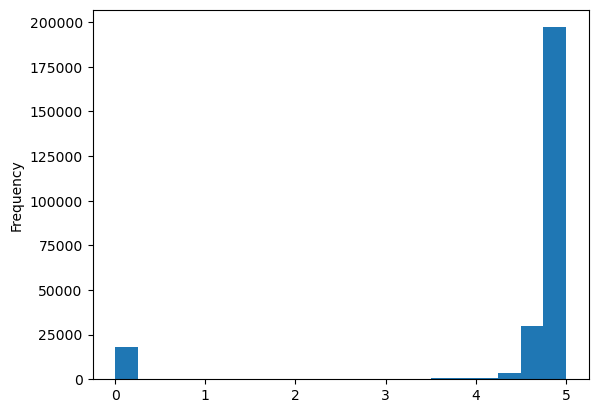

In [31]:
df_7['storeReview'].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

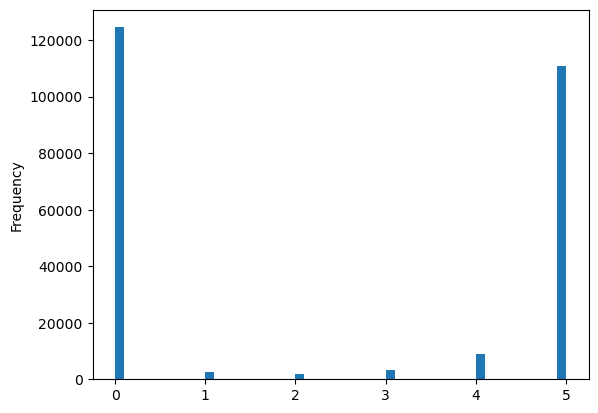

In [32]:
df_7['productRating'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Frequency'>

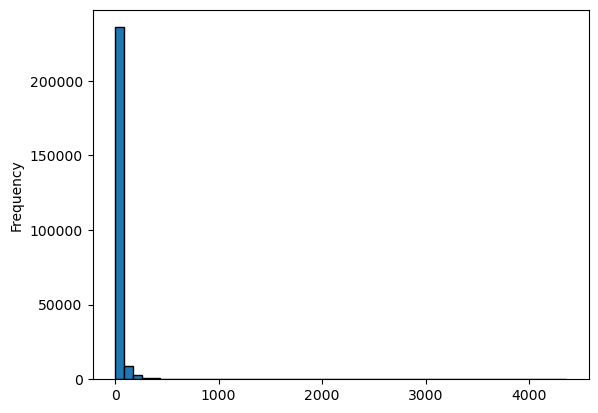

In [33]:
df_7['productAmountOfBuy'].plot.hist(bins = 50,edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

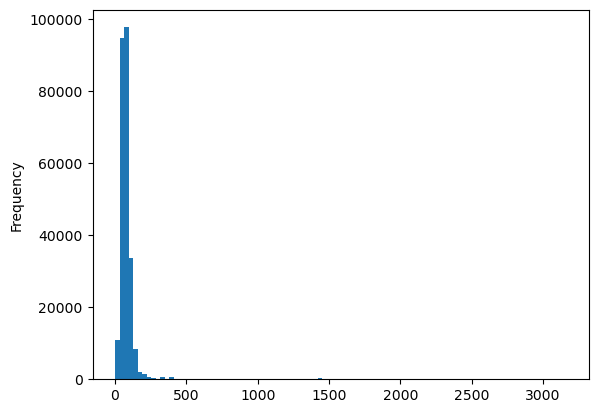

In [34]:
df_7['productPrice'].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

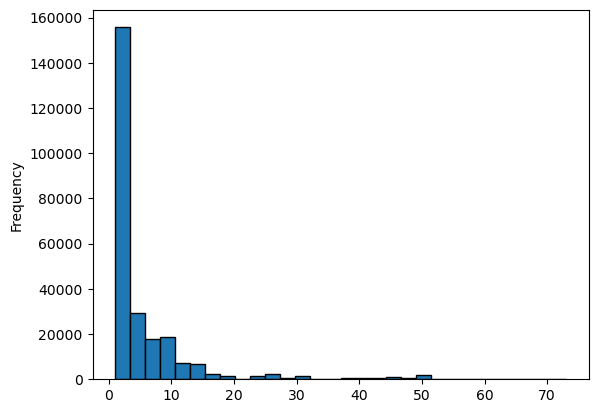

In [35]:
df_7['productHighlights'].plot.hist(bins = 30,edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

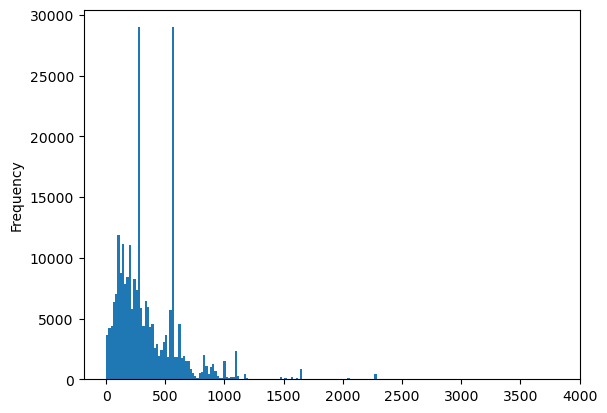

In [36]:
df_7['productDescription'].plot.hist(bins = 200)

<AxesSubplot:ylabel='Frequency'>

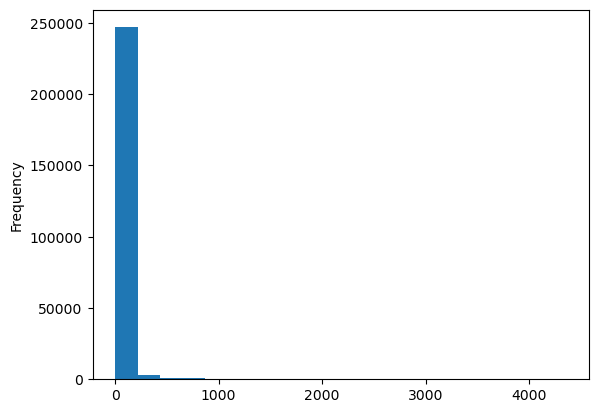

In [37]:
df_7['numReviewers'].plot.hist(bins = 20)

In [38]:
# we see that there are products that their amount of buyers are 0 so we will disguard them 

In [39]:
df_7['productAmountOfBuy'].replace(0, np.nan, inplace=True)                     # replace products that their amount of buyers are 0 to NoN

In [40]:
df_7.dropna(subset=['productAmountOfBuy'], inplace=True)                        # erase products that their amount of buyers are 0

In [41]:
df_7.describe(include='all')

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
count,127471,127471,127471.000000,127471.000000,127471.000000,127471.000000,127471.000000,127471.000000,127471,127471.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Shirts & Tees,T-shirts,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN
freq,127471,127471,NaN,NaN,NaN,NaN,NaN,NaN,80615,NaN
mean,NaN,NaN,4.824024,4.750210,56.053997,72.187851,6.075602,381.357493,NaN,56.010497
std,NaN,NaN,0.324128,0.763557,199.243233,32.312162,8.776855,263.273713,NaN,199.006653
min,NaN,NaN,0.000000,1.000000,4.000000,7.120000,1.000000,1.000000,NaN,4.000000
25%,NaN,NaN,4.818900,5.000000,8.000000,45.800000,1.000000,188.000000,NaN,8.000000
50%,NaN,NaN,4.860400,5.000000,17.000000,70.710000,3.000000,333.000000,NaN,17.000000
75%,NaN,NaN,4.905800,5.000000,42.000000,92.750000,8.000000,560.000000,NaN,42.000000


In [42]:
# Vizualization of single values

<AxesSubplot:ylabel='Frequency'>

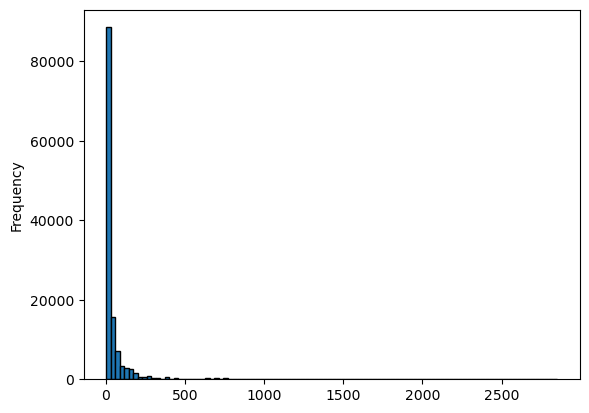

In [43]:
df_graphs = df_7[df_7['productAmountOfBuy'] <=4100]

df_graphs['productAmountOfBuy'].plot.hist(bins = 100,edgecolor='black')

In [44]:
df_filtered = df_7[df_7['productAmountOfBuy'] <= 400]  

<AxesSubplot:ylabel='Frequency'>

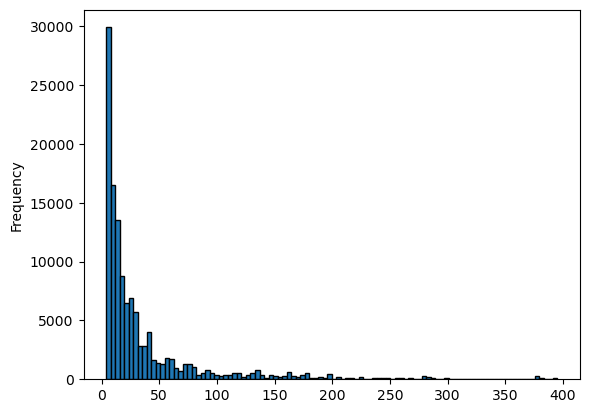

In [45]:
df_filtered['productAmountOfBuy'].plot.hist(bins = 100,edgecolor='black')

#df_filtered = df_7[df_7['productAmountOfBuy'] <= 800                                   #  outliers

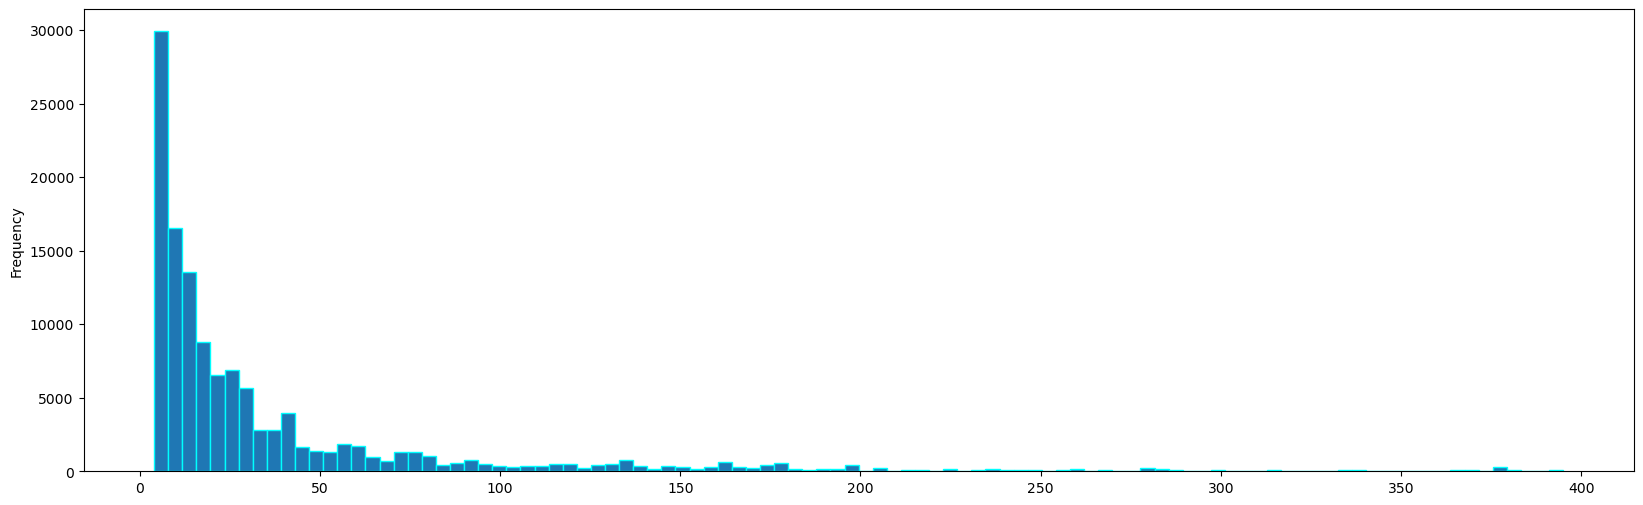

In [46]:
plt.figure(figsize=(20, 6))  # Set the size of the figure (width=10, height=6)
df_filtered['productAmountOfBuy'].plot.hist(bins=100, edgecolor='aqua')

plt.show()

<AxesSubplot:>

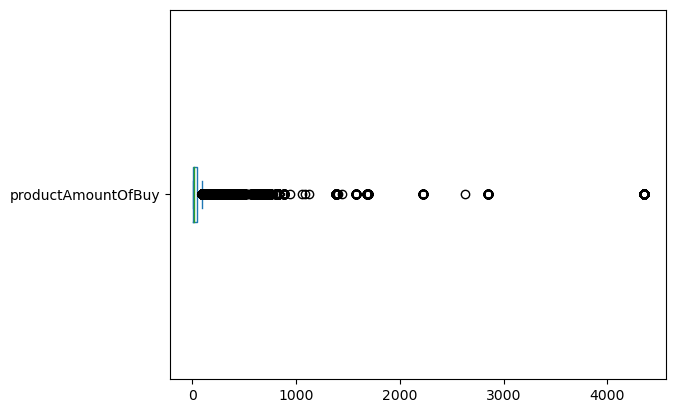

In [47]:
df_7['productAmountOfBuy'].plot.box(vert=False)

<AxesSubplot:>

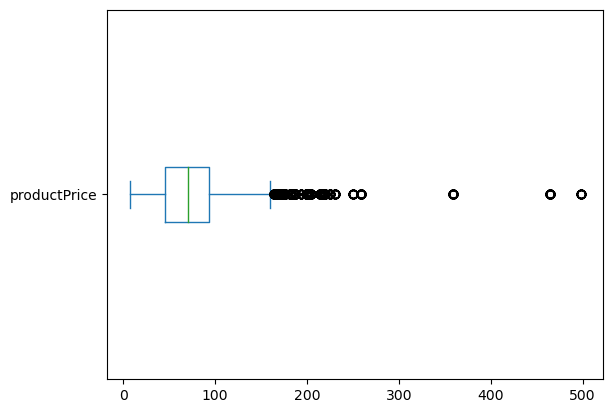

In [48]:
df_7['productPrice'].plot.box(vert=False)

In [49]:
df_filtered.corr()                                                                                                # no distinct match

,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,numReviewers
storeReview,1.000000,0.047320,0.041978,0.052617,-0.035971,0.020330,0.041971
productRating,0.047320,1.000000,-0.017722,0.088006,-0.005816,-0.054934,-0.017723
productAmountOfBuy,0.041978,-0.017722,1.000000,-0.061341,-0.026849,0.033943,0.999981
productPrice,0.052617,0.088006,-0.061341,1.000000,0.216736,-0.174613,-0.061330
productHighlights,-0.035971,-0.005816,-0.026849,0.216736,1.000000,0.104254,-0.026839
productDescription,0.020330,-0.054934,0.033943,-0.174613,0.104254,1.000000,0.033961
numReviewers,0.041971,-0.017723,0.999981,-0.061330,-0.026839,0.033961,1.000000


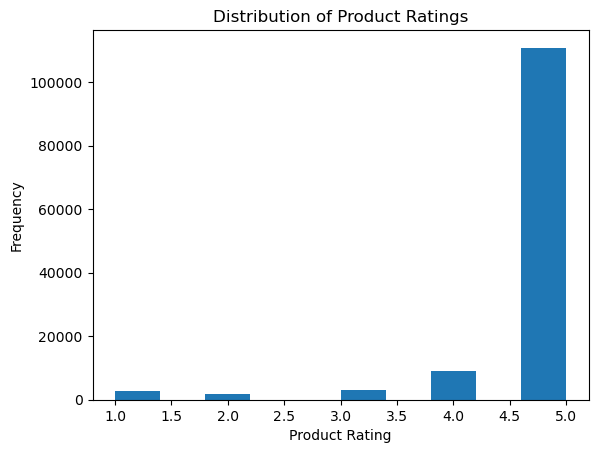

In [50]:
plt.hist(df_7['productRating'], bins=10)
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

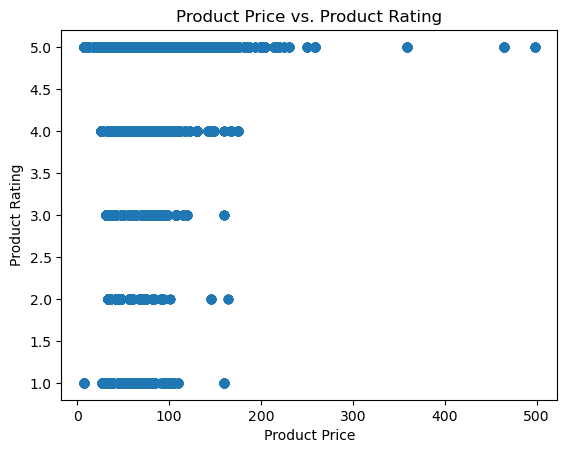

In [51]:
plt.scatter(df_7['productPrice'], df_7['productRating'])                             # not distinct
plt.xlabel('Product Price')
plt.ylabel('Product Rating')
plt.title('Product Price vs. Product Rating')
plt.show()

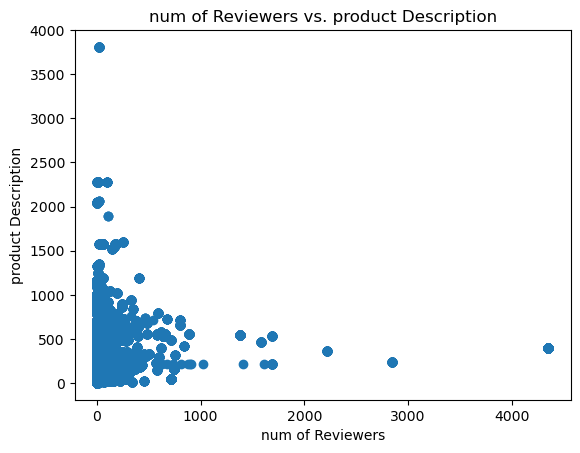

In [52]:
plt.scatter(df_7['numReviewers'], df_7['productDescription'])                             # not distinct
plt.xlabel('num of Reviewers')
plt.ylabel('product Description')
plt.title('num of Reviewers vs. product Description')
plt.show()

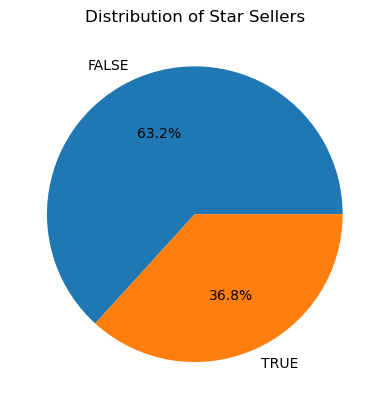

In [53]:
df_7['StarSeller'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Star Sellers')
plt.ylabel('')
plt.show()

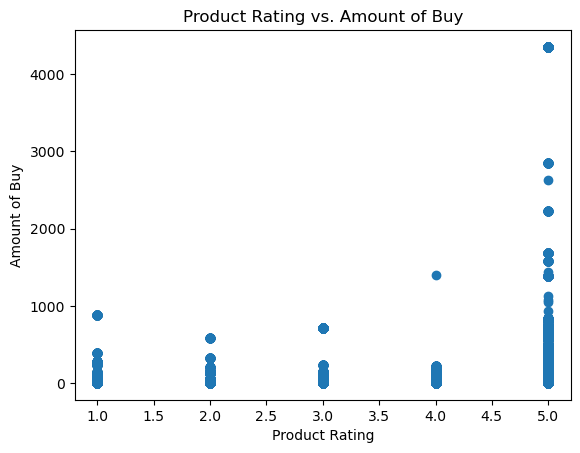

In [54]:
plt.scatter(df_7['productRating'], df_7['productAmountOfBuy'])
plt.xlabel('Product Rating')
plt.ylabel('Amount of Buy')
plt.title('Product Rating vs. Amount of Buy')
plt.show()

In [55]:
#    dealing with outliers
df_8 = df_7

In [56]:
mycols = ['productAmountOfBuy', 'productPrice']
all_outliers_rows = []
for col in mycols:
    Q1 = np.percentile(df_8[col],25)
    Q3 = np.percentile(df_8[col],75)
    IQR = Q3 - Q1
    IQR_range = 1.5 * IQR
    
    col_outlier = df_8[(df_8[col] < Q1 - IQR_range) | 
                       (df_8[col] > Q3 + IQR_range)].index
    all_outliers_rows.extend(col_outlier)
print(all_outliers_rows)    

[2, 5, 8, 11, 15, 16, 18, 21, 23, 24, 29, 32, 33, 35, 36, 43, 46, 47, 48, 50, 51, 56, 59, 60, 61, 62, 66, 68, 69, 75, 78, 79, 80, 81, 86, 89, 90, 97, 100, 101, 102, 103, 105, 109, 111, 113, 114, 122, 125, 126, 127, 128, 130, 131, 135, 137, 138, 140, 141, 148, 150, 153, 154, 155, 156, 158, 159, 164, 166, 167, 168, 170, 171, 178, 179, 181, 184, 185, 186, 187, 189, 190, 192, 196, 198, 199, 200, 201, 203, 204, 211, 212, 213, 215, 218, 219, 220, 221, 223, 224, 226, 231, 233, 234, 235, 236, 239, 240, 247, 248, 249, 250, 252, 255, 256, 257, 258, 260, 261, 263, 265, 269, 271, 272, 273, 274, 276, 278, 279, 286, 287, 288, 289, 295, 296, 297, 298, 300, 301, 303, 305, 306, 310, 312, 313, 314, 315, 317, 320, 321, 328, 329, 330, 331, 337, 339, 340, 341, 342, 344, 346, 348, 351, 352, 353, 354, 356, 357, 359, 361, 362, 365, 366, 373, 374, 375, 376, 379, 383, 385, 386, 387, 388, 390, 392, 395, 398, 399, 400, 401, 403, 404, 406, 408, 409, 413, 414, 421, 422, 423, 424, 427, 432, 434, 435, 436, 437, 439, 

<AxesSubplot:>

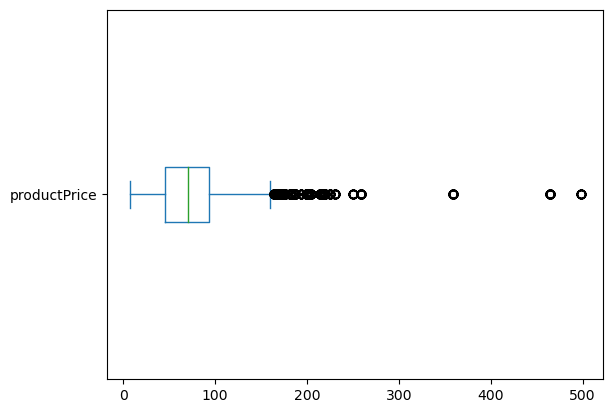

In [57]:
df_8['productPrice'].plot.box(vert=False)

<AxesSubplot:>

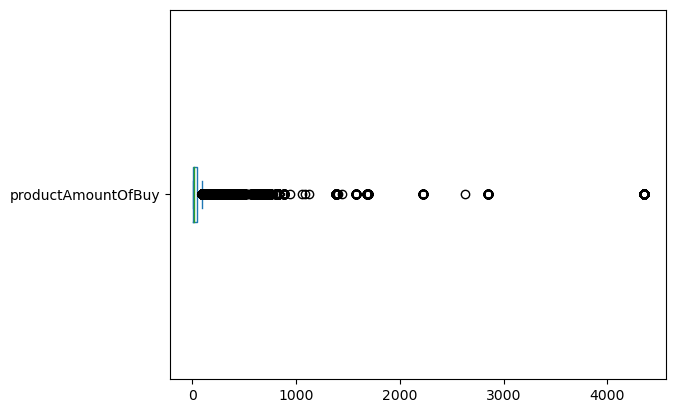

In [58]:
df_8['productAmountOfBuy'].plot.box(vert=False)

In [59]:
example = df_8                                             # try

numerical_columns = [ 'productAmountOfBuy', 'productPrice']

# Calculate the IQR for each numerical column
Q1 = example[numerical_columns].quantile(0.25)
Q3 = example[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

threshold = 0.5

                                                                                                                               # Filter the df to *include* rows with outliers
outliers = example[((example[numerical_columns] <(Q1 - threshold * IQR)) | (example[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

print(outliers)

             category subCategory  storeReview  productRating  \
2       Shirts & Tees    T-shirts       4.9378            5.0   
5       Shirts & Tees    T-shirts       4.9378            5.0   
8       Shirts & Tees    T-shirts       4.9378            5.0   
11      Shirts & Tees    T-shirts       4.9378            5.0   
15      Shirts & Tees    T-shirts       4.9378            5.0   
...               ...         ...          ...            ...   
252180  Shirts & Tees    T-shirts       4.5556            1.0   
252203  Shirts & Tees    T-shirts       4.9443            5.0   
252206  Shirts & Tees    T-shirts       4.9175            5.0   
252233  Shirts & Tees    T-shirts       4.8896            5.0   
252234  Shirts & Tees    T-shirts       4.7955            5.0   

        productAmountOfBuy  productPrice  productHighlights  \
2                   1688.0         79.04                  1   
5                   1688.0         79.04                  1   
8                    281.0    

In [60]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29972 entries, 2 to 252234
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            29972 non-null  object 
 1   subCategory         29972 non-null  object 
 2   storeReview         29972 non-null  float64
 3   productRating       29972 non-null  float64
 4   productAmountOfBuy  29972 non-null  float64
 5   productPrice        29972 non-null  float64
 6   productHighlights   29972 non-null  int32  
 7   productDescription  29972 non-null  int32  
 8   StarSeller          29972 non-null  object 
 9   numReviewers        29972 non-null  float64
dtypes: float64(5), int32(2), object(3)
memory usage: 2.3+ MB


In [61]:
outliers.describe()

,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,numReviewers
count,29972.000000,29972.000000,29972.000000,29972.00000,29972.000000,29972.000000,29972.000000
mean,4.841665,4.758374,181.032831,83.13304,6.223108,370.279928,180.848926
std,0.227768,0.754777,384.480376,48.00879,8.956792,243.070619,384.018646
min,0.000000,1.000000,4.000000,7.12000,1.000000,9.000000,4.000000
25%,4.832000,5.000000,62.000000,45.80000,1.000000,188.000000,62.000000
50%,4.881900,5.000000,93.000000,74.35000,3.000000,319.000000,93.000000
75%,4.928600,5.000000,172.000000,111.34000,7.000000,549.000000,172.000000
max,5.000000,5.000000,4353.000000,498.14000,50.000000,2281.000000,4353.000000


In [62]:
outliers.describe(include='all')

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
count,29972,29972,29972.000000,29972.000000,29972.000000,29972.00000,29972.000000,29972.000000,29972,29972.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Shirts & Tees,T-shirts,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN
freq,29972,29972,NaN,NaN,NaN,NaN,NaN,NaN,17196,NaN
mean,NaN,NaN,4.841665,4.758374,181.032831,83.13304,6.223108,370.279928,NaN,180.848926
std,NaN,NaN,0.227768,0.754777,384.480376,48.00879,8.956792,243.070619,NaN,384.018646
min,NaN,NaN,0.000000,1.000000,4.000000,7.12000,1.000000,9.000000,NaN,4.000000
25%,NaN,NaN,4.832000,5.000000,62.000000,45.80000,1.000000,188.000000,NaN,62.000000
50%,NaN,NaN,4.881900,5.000000,93.000000,74.35000,3.000000,319.000000,NaN,93.000000
75%,NaN,NaN,4.928600,5.000000,172.000000,111.34000,7.000000,549.000000,NaN,172.000000


<AxesSubplot:>

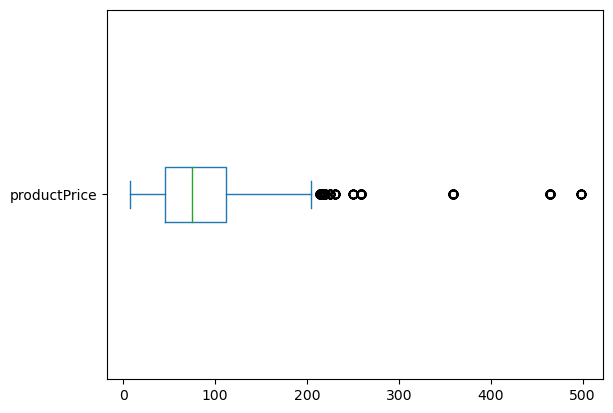

In [63]:
outliers['productPrice'].plot.box(vert=False)

In [64]:
outliers.describe(include='all')

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,numReviewers
count,29972,29972,29972.000000,29972.000000,29972.000000,29972.00000,29972.000000,29972.000000,29972,29972.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Shirts & Tees,T-shirts,NaN,NaN,NaN,NaN,NaN,NaN,FALSE,NaN
freq,29972,29972,NaN,NaN,NaN,NaN,NaN,NaN,17196,NaN
mean,NaN,NaN,4.841665,4.758374,181.032831,83.13304,6.223108,370.279928,NaN,180.848926
std,NaN,NaN,0.227768,0.754777,384.480376,48.00879,8.956792,243.070619,NaN,384.018646
min,NaN,NaN,0.000000,1.000000,4.000000,7.12000,1.000000,9.000000,NaN,4.000000
25%,NaN,NaN,4.832000,5.000000,62.000000,45.80000,1.000000,188.000000,NaN,62.000000
50%,NaN,NaN,4.881900,5.000000,93.000000,74.35000,3.000000,319.000000,NaN,93.000000
75%,NaN,NaN,4.928600,5.000000,172.000000,111.34000,7.000000,549.000000,NaN,172.000000


In [65]:
outliers.corr() 

,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,numReviewers
storeReview,1.000000,0.077841,0.011360,0.015820,-0.104210,-0.058328,0.011171
productRating,0.077841,1.000000,-0.013869,0.119810,-0.052431,-0.051753,-0.013970
productAmountOfBuy,0.011360,-0.013869,1.000000,-0.189984,-0.088571,0.050453,0.999624
productPrice,0.015820,0.119810,-0.189984,1.000000,0.220463,-0.200579,-0.190017
productHighlights,-0.104210,-0.052431,-0.088571,0.220463,1.000000,0.052693,-0.088501
productDescription,-0.058328,-0.051753,0.050453,-0.200579,0.052693,1.000000,0.050827
numReviewers,0.011171,-0.013970,0.999624,-0.190017,-0.088501,0.050827,1.000000


In [66]:
 outliers.to_csv('final_df_shrts_for_Machine_Learning4.csv', index=False)                                # save new df for machine learning

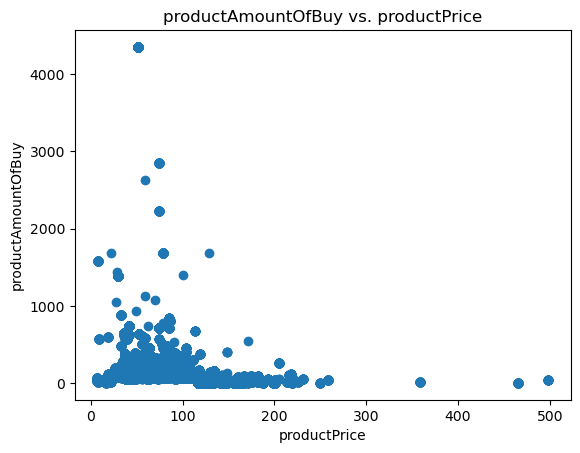

In [67]:
plt.scatter(outliers['productPrice'], outliers['productAmountOfBuy'])                             # not distinct
plt.xlabel('productPrice')
plt.ylabel('productAmountOfBuy')
plt.title('productAmountOfBuy vs. productPrice')
plt.show()

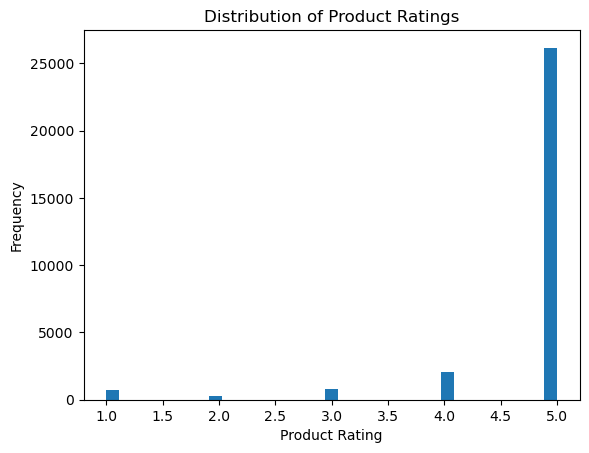

In [68]:
plt.hist(outliers['productRating'], bins=35)
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

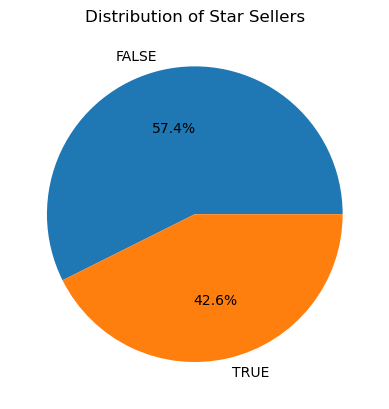

In [69]:
outliers['StarSeller'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Star Sellers')
plt.ylabel('')
plt.show()

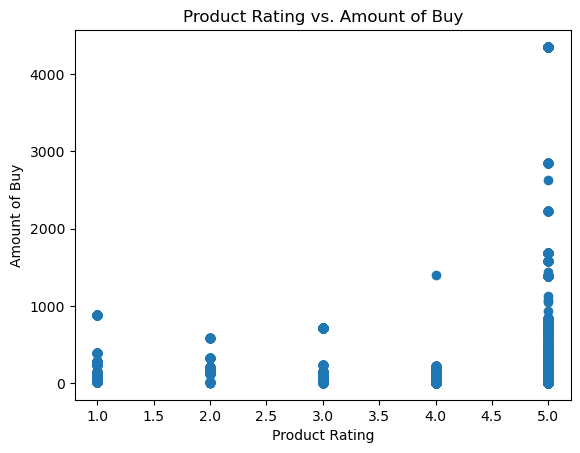

In [70]:
plt.scatter(outliers['productRating'], outliers['productAmountOfBuy'])
plt.xlabel('Product Rating')
plt.ylabel('Amount of Buy')
plt.title('Product Rating vs. Amount of Buy')
plt.show()

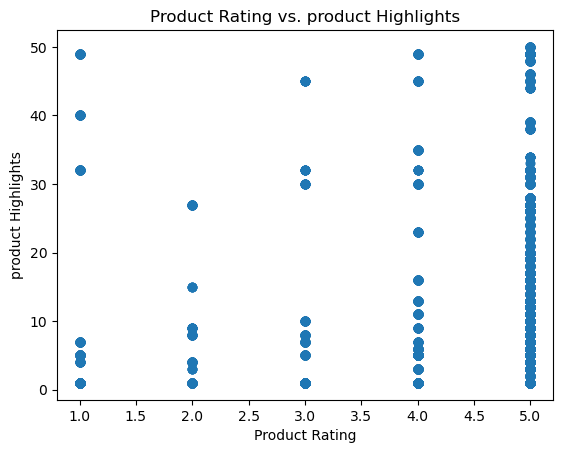

In [71]:
plt.scatter(outliers['productRating'], outliers['productHighlights'])
plt.xlabel('Product Rating')
plt.ylabel('product Highlights')
plt.title('Product Rating vs. product Highlights')
plt.show()

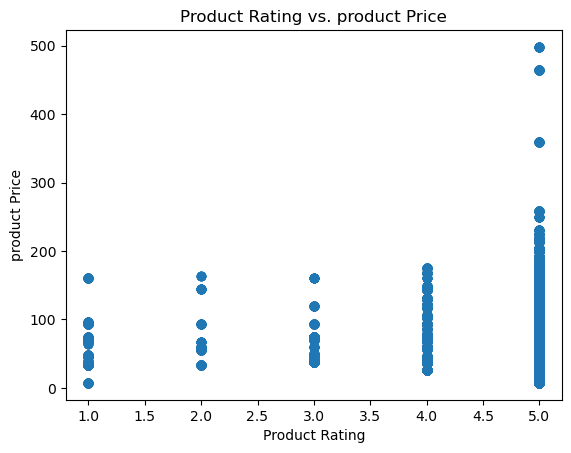

In [72]:
plt.scatter(outliers['productRating'], outliers['productPrice'])
plt.xlabel('Product Rating')
plt.ylabel('product Price')
plt.title('Product Rating vs. product Price')
plt.show()

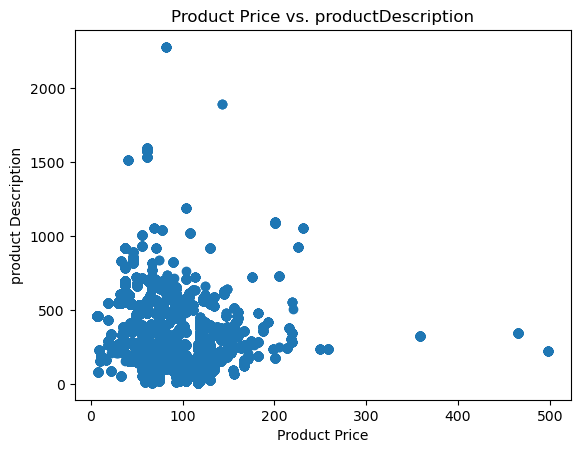

In [73]:
plt.scatter(outliers['productPrice'], outliers['productDescription'])                             # not distinct
plt.xlabel('Product Price')
plt.ylabel('product Description')
plt.title('Product Price vs. productDescription')
plt.show()

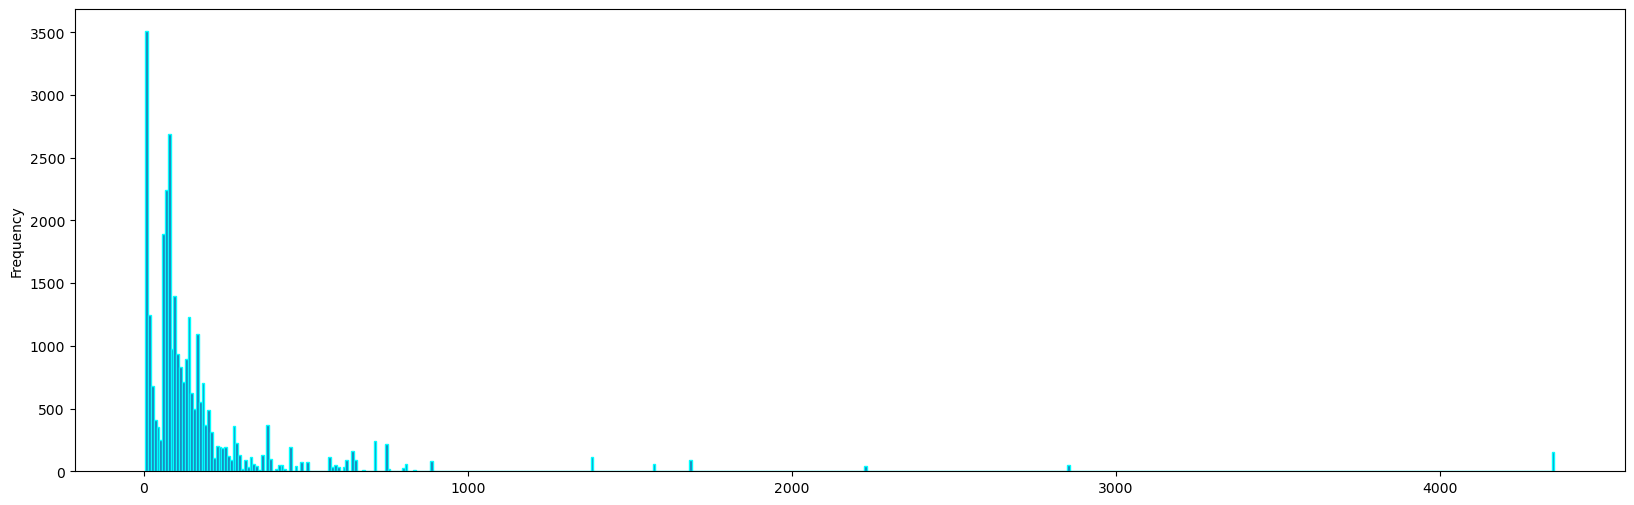

In [74]:
plt.figure(figsize=(20, 6))                                                             # Set the size of the figure (width=20, height=6)
outliers['productAmountOfBuy'].plot.hist(bins=500, edgecolor='aqua')

plt.show()

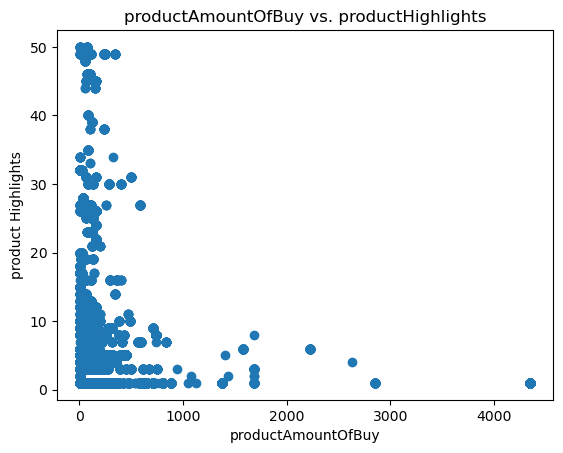

In [75]:
plt.scatter(outliers['productAmountOfBuy'], outliers['productHighlights'])                            
plt.xlabel('productAmountOfBuy')
plt.ylabel('product Highlights')
plt.title('productAmountOfBuy vs. productHighlights')
plt.show()

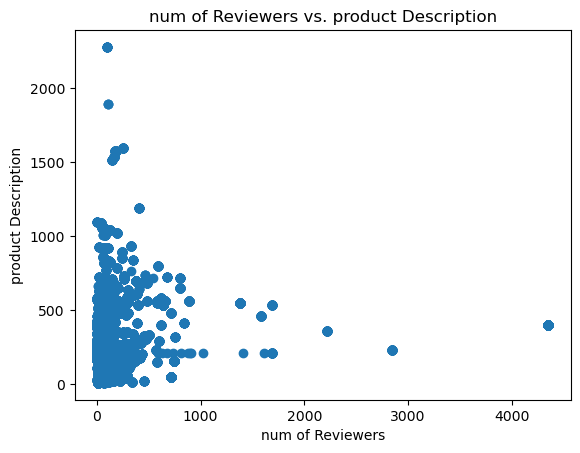

In [76]:
plt.scatter(outliers['numReviewers'], outliers['productDescription'])                             # not distinct
plt.xlabel('num of Reviewers')
plt.ylabel('product Description')
plt.title('num of Reviewers vs. product Description')
plt.show()

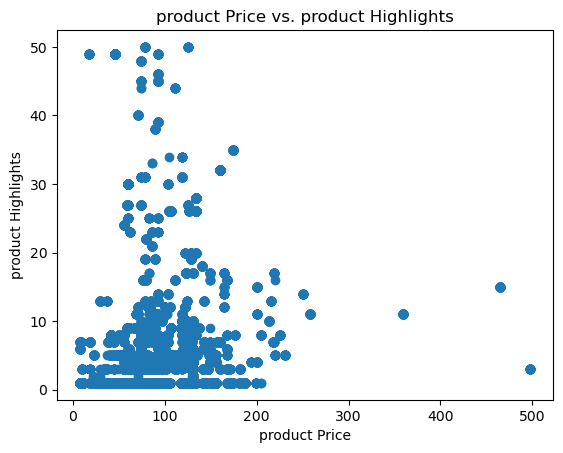

In [77]:
plt.scatter(outliers['productPrice'], outliers['productHighlights'])                             # not distinct
plt.xlabel('product Price')
plt.ylabel('product Highlights')
plt.title('product Price vs. product Highlights')
plt.show()

In [78]:
# Machine learning - classification problem

In [134]:
df = pd.read_csv('final_df_shirts_for_Machine_Learning4.csv')                                             # import df

In [135]:
df.drop(["numReviewers"], axis=1, inplace=True)
df

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller
0,Shirts & Tees,T-shirts,4.9378,5,1688,79.04,1,211,True
1,Shirts & Tees,T-shirts,4.9378,5,1494,82.44,1,341,False
2,Shirts & Tees,T-shirts,4.9378,5,281,79.04,1,234,True
3,Shirts & Tees,T-shirts,4.9378,5,1711,81.86,1,191,True
4,Shirts & Tees,T-shirts,4.9378,5,230,79.04,3,234,True
...,...,...,...,...,...,...,...,...,...
29967,Shirts & Tees,T-shirts,4.5556,1,13,7.40,7,83,True
29968,Shirts & Tees,T-shirts,4.9443,5,4353,51.86,1,401,True
29969,Shirts & Tees,T-shirts,4.9175,5,94,44.57,1,353,True
29970,Shirts & Tees,T-shirts,4.8896,5,60,48.33,5,160,False


In [117]:
df.loc[df['productAmountOfBuy'] > 500, 'shoppers'] = '3'                                                    
df.loc[(df['productAmountOfBuy'] > 100) & (df['productAmountOfBuy'] <= 500), 'shoppers'] = '2'
df.loc[df['productAmountOfBuy'] <= 100, 'shoppers'] = '1'

In [118]:
###################  KKN
def Knn(X, y):
    X=X.values
    y=y['shoppers'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    
    #standartscaler
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #KNeighbors
    classifier=KNeighborsClassifier(n_neighbors=30)
    classifier.fit(X_train,y_train)

    y_pred=classifier.predict(X_test)

    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return y_pred



In [119]:

X = df[['storeReview','productRating','productAmountOfBuy', 'productPrice', 'productHighlights', 'productDescription']]
y = df[['shoppers']]
y_pred = Knn(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           1       0.98      0.98      0.98      6398
           2       0.98      0.97      0.97      4858
           3       1.00      1.00      1.00       733

    accuracy                           0.98     11989
   macro avg       0.98      0.98      0.98     11989
weighted avg       0.98      0.98      0.98     11989

[[6299   99    0]
 [ 150 4705    3]
 [   1    0  732]]


In [120]:
########################

In [121]:
# Logistic Reggression

In [122]:
df.describe()

,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription
count,29972.000000,29972.000000,29972.000000,29972.000000,29972.000000,29972.000000
mean,4.841665,4.758374,181.025424,83.133247,6.223175,370.283598
std,0.227768,0.754777,384.459339,48.008779,8.956760,243.069402
min,0.000000,1.000000,4.000000,7.120000,1.000000,9.000000
25%,4.832000,5.000000,62.000000,45.800000,1.000000,188.000000
50%,4.881900,5.000000,93.000000,74.350000,3.000000,319.000000
75%,4.928600,5.000000,172.000000,111.340000,7.000000,549.000000
max,5.000000,5.000000,4353.000000,498.140000,50.000000,2281.000000


In [123]:
df.columns

Index(['category', 'subCategory', 'storeReview', 'productRating',
       'productAmountOfBuy', 'productPrice', 'productHighlights',
       'productDescription', 'StarSeller', 'shoppers'],
      dtype='object')

In [136]:
df.loc[df['productAmountOfBuy'] > 500, 'shoppers'] = '1'                                                    
# df.loc[(df['productAmountOfBuy'] > 100) & (df['productAmountOfBuy'] <= 500), 'shoppers'] = '2'
df.loc[df['productAmountOfBuy'] <= 500, 'shoppers'] = '0'

In [137]:
df.describe(include='all')

,category,subCategory,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,StarSeller,shoppers
count,29972,29972,29972.000000,29972.000000,29972.000000,29972.000000,29972.000000,29972.000000,29972,29972
unique,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,Shirts & Tees,T-shirts,NaN,NaN,NaN,NaN,NaN,NaN,False,0
freq,29972,29972,NaN,NaN,NaN,NaN,NaN,NaN,17197,28101
mean,NaN,NaN,4.841665,4.758374,181.025424,83.133247,6.223175,370.283598,NaN,NaN
std,NaN,NaN,0.227768,0.754777,384.459339,48.008779,8.956760,243.069402,NaN,NaN
min,NaN,NaN,0.000000,1.000000,4.000000,7.120000,1.000000,9.000000,NaN,NaN
25%,NaN,NaN,4.832000,5.000000,62.000000,45.800000,1.000000,188.000000,NaN,NaN
50%,NaN,NaN,4.881900,5.000000,93.000000,74.350000,3.000000,319.000000,NaN,NaN
75%,NaN,NaN,4.928600,5.000000,172.000000,111.340000,7.000000,549.000000,NaN,NaN


In [138]:
df_L_R = df
df_Logistic_R = df_L_R.drop(['category','subCategory','StarSeller'], axis=1, inplace=True)                                             # drop all nun numeric values
df

,storeReview,productRating,productAmountOfBuy,productPrice,productHighlights,productDescription,shoppers
0,4.9378,5,1688,79.04,1,211,1
1,4.9378,5,1494,82.44,1,341,1
2,4.9378,5,281,79.04,1,234,0
3,4.9378,5,1711,81.86,1,191,1
4,4.9378,5,230,79.04,3,234,0
...,...,...,...,...,...,...,...
29967,4.5556,1,13,7.40,7,83,0
29968,4.9443,5,4353,51.86,1,401,1
29969,4.9175,5,94,44.57,1,353,0
29970,4.8896,5,60,48.33,5,160,0


In [139]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(df.drop("shoppers",axis=1),df["shoppers"],random_state=0)

In [140]:
clf=LogisticRegression()
clf.fit(xtrain2,ytrain2)
acc=clf.score(xtest2,ytest2)
print(f"accuracy is {acc}")

accuracy is 0.9998665421059656


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
################ Naive base 

In [143]:
df.loc[df['productAmountOfBuy'] > 500, 'shoppers'] = '3'                                                    
df.loc[(df['productAmountOfBuy'] > 100) & (df['productAmountOfBuy'] <= 500), 'shoppers'] = '2'
df.loc[df['productAmountOfBuy'] <= 100, 'shoppers'] = '1'

In [144]:
def Naive_bayes(X,y):
    y=y["shoppers"].values
    XTrain, XTest, yTrain, yTest = train_test_split(X.values, y, random_state=1, test_size=0.25)

    gnb=GaussianNB()

    
    gnb.fit(XTrain,yTrain)
    y_pred=gnb.predict(XTest)
    y_pred_train=gnb.predict(XTrain)

    
    print('Accuracy on Train data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
    print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

In [145]:
X = df[['storeReview','productRating','productAmountOfBuy', 'productPrice', 'productHighlights', 'productDescription']]
y = df[['shoppers']]
Naive_bayes(X,y)

Accuracy on Train data=  0.894968637394902
Accuracy on test data=  0.899639663686107
